In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv('weather2.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Date,Team 1,Team 2,Team 1 Score,Team 2 Score,Venue,Weather (Degrees),Weather Type,Wind (MPH),Wind Direction
0,2014-03-22,ARI,LAD,1,3,Sydney Cricket Ground,75,Overcast,5,Varies
1,2014-03-22,ARI,LAD,5,7,Sydney Cricket Ground,79,Partly Cloudy,5,Varies
2,2014-03-30,LAD,SD,1,3,Petco Park,67,Clear,11,L To R
3,2014-03-31,CHC,PIT,0,1,PNC Park,54,Sunny,2,Out To CF
4,2014-03-31,KAN,DET,3,4,Comerica Park,52,Sunny,4,In From CF


In [4]:
df = df[['Venue', 'Weather (Degrees)', 'Wind (MPH)']]
df = df.groupby('Venue').mean()
df = df.reset_index()
df.head()

,Venue,Weather (Degrees),Wind (MPH)
0,Angel Stadium,75.279018,7.421875
1,BB&T Ballpark,75.666667,4.333333
2,Busch Stadium,78.168122,8.058952
3,Chase Field,80.629712,2.815965
4,Citi Field,72.772829,10.761693


In [5]:
park = pd.read_csv('park.csv')
park.head()

,YEAR,PARK NAME,RUNS,HR,H,2B,3B,BB,PARKID,LEAGUE,...,CF_wall_norm,CF_wall_stand,RCF_wall_norm,RCF_wall_stand,RF_wall_norm,RF_wall_stand,Area_norm,Area_stand,Back_norm,Back_stand
0,2001-01-01 00:00:00,Progressive Field,1.584,2.031,1.581,1.546,0.971,1.450,CLE08,AL,...,0.105263,-0.377697,0.15,-0.627716,0.5,0.49017,0.889262,-0.004813,0.907692,1.155407
1,2002-01-01 00:00:00,Progressive Field,1.031,1.049,0.984,1.029,0.489,0.964,CLE08,AL,...,0.105263,-0.377697,0.15,-0.627716,0.5,0.49017,0.889262,-0.004813,0.907692,1.155407
2,2003-01-01 00:00:00,Progressive Field,0.853,0.719,0.923,0.936,0.583,1.006,CLE08,AL,...,0.157895,-0.111632,0.20,-0.427418,0.5,0.49017,0.889262,-0.004813,1.000000,2.275899
3,2004-01-01 00:00:00,Progressive Field,0.960,0.742,0.952,1.115,0.781,1.127,CLE08,AL,...,0.157895,-0.111632,0.20,-0.427418,0.5,0.49017,0.889262,-0.004813,1.000000,2.275899
4,2005-01-01 00:00:00,Progressive Field,0.874,0.867,0.921,1.040,0.364,1.004,CLE08,AL,...,0.157895,-0.111632,0.20,-0.427418,0.5,0.49017,0.889262,-0.004813,1.000000,2.275899


In [6]:
park['YEAR'] = [i.replace('-01-01 00:00:00', '') for i in park['YEAR']]
park['YEAR'] = park['YEAR'].astype('int')
park = park[park['YEAR'] >= 2014]
park = park[['PARK NAME', 'RUNS', 'HR', 'H', '2B', '3B']]
park = park.groupby('PARK NAME').mean()
park = park.reset_index()
park.head()

,PARK NAME,RUNS,HR,H,2B,3B
0,Angel Stadium,0.937667,1.000667,0.963667,0.913333,0.673833
1,Busch Stadium,0.947333,0.876667,0.988167,0.974667,0.953333
2,Chase Field,1.112833,1.067833,1.058333,1.124500,1.792667
3,Citi Field,0.864167,0.954333,0.887667,0.865500,0.664167
4,Citizens Bank Park,0.994833,1.212000,0.980333,0.912333,0.884000


In [7]:
park['PARK NAME'].unique()

array(['Angel Stadium', 'Busch Stadium', 'Chase Field', 'Citi Field',
       'Citizens Bank Park', 'Comerica Park', 'Coors Field',
       'Dodger Stadium', 'Fenway Park', 'Great American Ball Park',
       'Guaranteed Rate Field', 'Kauffman Stadium', 'Marlins Park',
       'Miller Park', 'Minute Maid Park', 'Nationals Park', 'Oracle Park',
       'Oriole Park at Camden Yards', 'PNC Park', 'Petco Park',
       'Progressive Field', 'Rogers Centre', 'T-Mobile Park',
       'Target Field', 'Tropicana Field', 'Truist Park', 'Wrigley Field',
       'Yankee Stadium'], dtype=object)

In [8]:
merge = pd.merge(left= park, right= df, left_on= 'PARK NAME', right_on= 'Venue')
merge = merge.drop(['Venue'], axis = 1)
merge.head()

,PARK NAME,RUNS,HR,H,2B,3B,Weather (Degrees),Wind (MPH)
0,Angel Stadium,0.937667,1.000667,0.963667,0.913333,0.673833,75.279018,7.421875
1,Busch Stadium,0.947333,0.876667,0.988167,0.974667,0.953333,78.168122,8.058952
2,Chase Field,1.112833,1.067833,1.058333,1.124500,1.792667,80.629712,2.815965
3,Citi Field,0.864167,0.954333,0.887667,0.865500,0.664167,72.772829,10.761693
4,Citizens Bank Park,0.994833,1.212000,0.980333,0.912333,0.884000,75.657080,8.993363


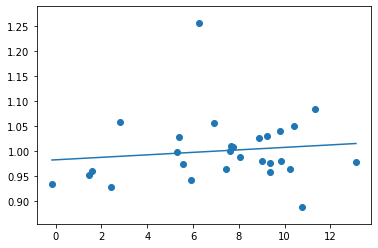

In [9]:
x = merge['Wind (MPH)']
y = merge['H']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

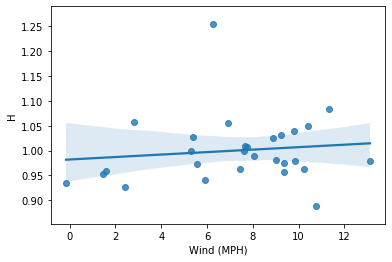

In [10]:
sns.regplot(x, y)

In [11]:
model = np.polyfit(x, y, 1)
model

array([0.0024844 , 0.98206106])

In [12]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3889
Date:                Sun, 28 Jun 2020   Prob (F-statistic):              0.538
Time:                        13:23:39   Log-Likelihood:                 36.566
No. Observations:                  28   AIC:                            -69.13
Df Residuals:                      26   BIC:                            -66.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9821      0.032     31.024      0.000       0.917       1.047
Wind (MPH)     0.0025      0.004      0.624      0.538      -0.006       0.011
==============================================================================
Omnibus:                       27.638   Durbin-Watson:                   2.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.417
Skew:                           1.965   Prob(JB):                     2.79e-14
Kurtosis:                       9.169   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

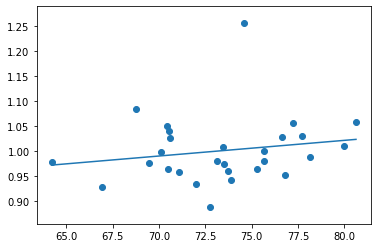

In [13]:
x = merge['Weather (Degrees)']
y = merge['H']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

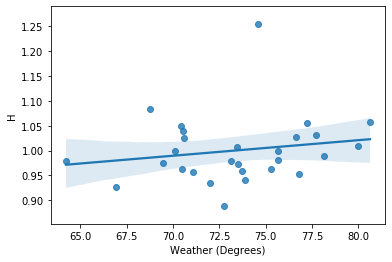

In [14]:
sns.regplot(x, y)

In [15]:
model = np.polyfit(x, y, 1)
model

array([0.00313111, 0.77046728])

In [16]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8722
Date:                Sun, 28 Jun 2020   Prob (F-statistic):              0.359
Time:                        13:23:41   Log-Likelihood:                 36.820
No. Observations:                  28   AIC:                            -69.64
Df Residuals:                      26   BIC:                            -66.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7705      0.246      3.129      0.004       0.264       1.277
Weather (Degrees)     0.0031      0.003      0.934      0.359      -0.004       0.010
==============================================================================
Omnibus:                       26.542   Durbin-Watson:                   2.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.805
Skew:                           1.937   Prob(JB):                     1.26e-12
Kurtosis:                       8.654   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x = merge[['Weather (Degrees)', 'Wind (MPH)']]
y = merge['H']
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9301
Date:                Sun, 28 Jun 2020   Prob (F-statistic):              0.408
Time:                        13:23:41   Log-Likelihood:                 37.363
No. Observations:                  28   AIC:                            -68.73
Df Residuals:                      25   BIC:                            -64.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6545      0.272      2.402      0.024       0.093       1.216
Weather (Degrees)     0.0043      0.004      1.210      0.238      -0.003       0.012
Wind (MPH)            0.0042      0.004      0.994      0.330      -0.004       0.013
==============================================================================
Omnibus:                       29.391   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.049
Skew:                           2.052   Prob(JB):                     1.37e-16
Kurtosis:                       9.765   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Weather (Degrees)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
predictions = regressor.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
correct = 0
comparison

,Real,Predictions
0,0.927167,0.988053
1,0.998500,0.977623
2,0.963667,1.013322
3,0.988167,1.024670
4,1.049500,0.965390
5,1.025667,0.993292


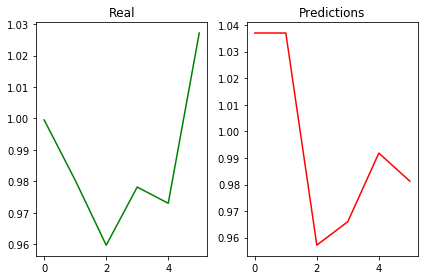

In [20]:
fig, (g1, g2) = plt.subplots(1, 2)
g1.plot(comparison.index, comparison["Real"], color = "Green")
g2.plot(comparison.index, comparison["Predictions"], color = "Red")
g1.set_title("Real")
g2.set_title("Predictions")
fig.tight_layout()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Wind (MPH)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
predictions = regressor.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
comparison

,Real,Predictions
0,0.927167,0.988053
1,0.998500,0.977623
2,0.963667,1.013322
3,0.988167,1.024670
4,1.049500,0.965390
5,1.025667,0.993292


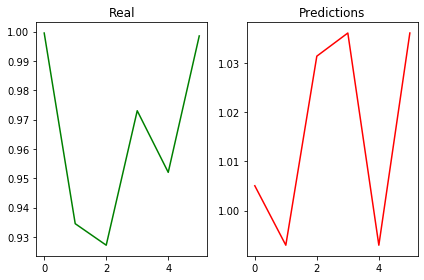

In [23]:
fig, (g1, g2) = plt.subplots(1, 2)
g1.plot(comparison.index, comparison["Real"], color = "Green")
g2.plot(comparison.index, comparison["Predictions"], color = "Red")
g1.set_title("Real")
g2.set_title("Predictions")
fig.tight_layout()
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = pd.DataFrame(merge, columns = ['Weather (Degrees)', 'Wind (MPH)']), pd.DataFrame(merge, columns = ['H'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
predictions = regressor.predict(x_test)
predictions = [float(i) for i in predictions]
comparison = pd.DataFrame({"Real" : y_test.iloc[:,0], "Predictions" : predictions})
comparison = comparison.reset_index()
comparison = comparison.drop(['index'], axis=1)
comparison

,Real,Predictions
0,0.927167,0.988053
1,0.998500,0.977623
2,0.963667,1.013322
3,0.988167,1.024670
4,1.049500,0.965390
5,1.025667,0.993292


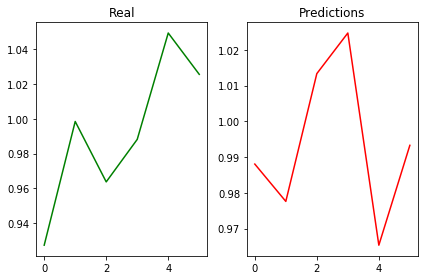

In [26]:
fig, (g1, g2) = plt.subplots(1, 2)
g1.plot(comparison.index, comparison["Real"], color = "Green")
g2.plot(comparison.index, comparison["Predictions"], color = "Red")
g1.set_title("Real")
g2.set_title("Predictions")
fig.tight_layout()
plt.show()